Missing values in the dataset:
 symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


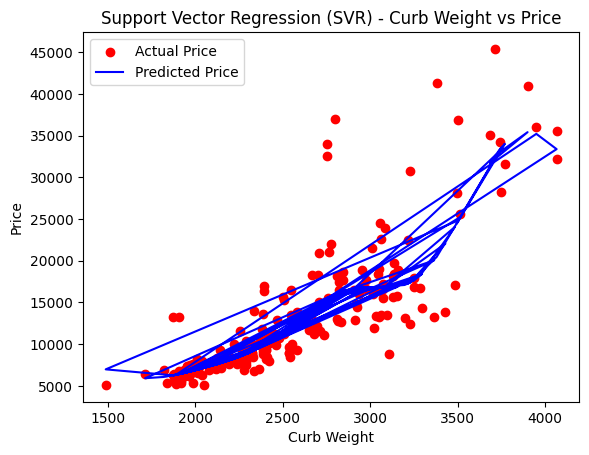

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer

# Step 1: Load Data
data = pd.read_csv('Automobile_data.csv')

# Step 2: Data Cleaning
# Replace '?' with NaN for easier processing
data.replace('?', np.nan, inplace=True)

# Check for missing values in the relevant columns
print("Missing values in the dataset:\n", data.isnull().sum())

# Replace missing values with the mean (you can also choose median or other strategies)
imputer = SimpleImputer(strategy='mean')
data[['curb-weight', 'price']] = imputer.fit_transform(data[['curb-weight', 'price']])

# Ensure the columns are numeric
data['curb-weight'] = pd.to_numeric(data['curb-weight'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Step 3: Extract the independent and dependent variables
X = data[['curb-weight']].values  # Independent variable
y = data['price'].values         # Dependent variable (price)

# Step 4: Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()

# Scale the features and target
X_scaled = sc_X.fit_transform(X)
y_scaled = np.squeeze(sc_y.fit_transform(y.reshape(-1, 1)))  # Reshaping y to avoid warnings

# Step 5: Fit SVR Model
regressor = SVR(kernel='rbf')  # Radial Basis Function (RBF) Kernel
regressor.fit(X_scaled, y_scaled)

# Step 6: Predict with SVR
y_pred_scaled = regressor.predict(X_scaled)

# Inverse transform to get predictions in the original scale
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Step 7: Visualize Results
# Scatter plot of actual values
plt.scatter(X, y, color='red', label='Actual Price')

# Plot the predicted values
plt.plot(X, y_pred, color='blue', label='Predicted Price')

# Labels and title
plt.title('Support Vector Regression (SVR) - Curb Weight vs Price')
plt.xlabel('Curb Weight')
plt.ylabel('Price')
plt.legend()

plt.show()
